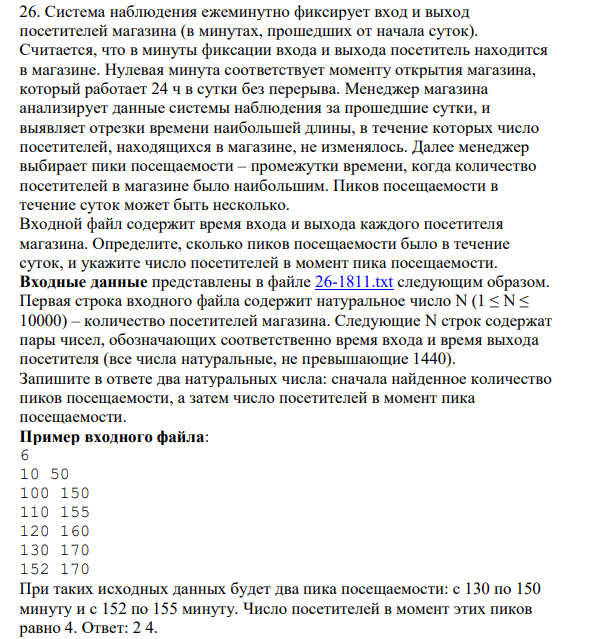

In [2]:
from collections import defaultdict
N, *arr = open('26-example.txt').readlines()
N = int(N)
arr = [list(map(int, line.split())) for line in arr]
counter = defaultdict(int)
for tin, tout in arr:
    counter[tin] += 1
    counter[tout] -= 1
counter = {k: counter[k] for k in sorted(counter)}

In [5]:
print(counter)

{10: 1, 50: -1, 100: 1, 110: 1, 120: 1, 130: 1, 150: -1, 152: 1, 155: -1, 160: -1, 170: -2}


In [7]:
cum_counter = {}
s = 0
for k, v in counter.items():
    s += v
    cum_counter[k] = s
max_amount = max(cum_counter.values())
count = sum(v == max_amount for v in cum_counter.values())
print(count, max_amount)

2 4


In [ ]:
N, *arr = open('26-1811.txt').readlines()
N = int(N)
arr = [list(map(int, line.split())) for line in arr]
counter = defaultdict(int)
for tin, tout in arr:
    counter[tin] += 1
    counter[tout+1] -= 1
cum_counter = {}
s = 0
for k in sorted(counter):
    delta = counter[k] # если число людей не изменилось, то не разбиваем интервал на 2, а продолжаем
    if delta == 0:
        continue
    s += counter[k]
    cum_counter[k] = s
max_amount = max(cum_counter.values())
count = sum(v == max_amount for v in cum_counter.values())
print(count, max_amount)

1 644


In [45]:
def our(arr):
    counter = defaultdict(int)
    for tin, tout in arr:
        counter[tin] += 1
        counter[tout+1] -= 1
    cum_counter = {}
    s = 0
    for k in sorted(counter):
        delta = counter[k] # если число людей не изменилось, то не разбиваем интервал на 2, а продолжаем
        if delta == 0:
            continue
        s += counter[k]
        cum_counter[k] = s
    max_amount = max(cum_counter.values())
    count = sum(v == max_amount for v in cum_counter.values())
    return count, max_amount

def their(a):
    a.sort()
    kmx = 0
    mx = 0
    last = 0
    shop = []
    for i in a:
        j = 0
        while j < len(shop):
            if shop[j] < i[0]:
                del shop[j]
            else:
                j += 1
        shop.append(i[1])
        if len(shop) > mx:
            mx = len(shop)
            kmx = 1
        elif len(shop) == mx and last != mx:
            kmx += 1
        last = len(shop)
    return kmx, mx

In [47]:
from random import randint
from tqdm import tqdm

def gen():
    a = randint(1, 1_000)
    b = randint(a, 1440)
    return a, b


for i in tqdm(range(100)):
    N = randint(100, 10_000)
    data = [gen() for _ in range(N)]
    assert our(data) == their(data)
    

 11%|█         | 11/100 [00:15<02:09,  1.45s/it]


AssertionError: 

In [48]:
our(data)

(1, 5126)

In [49]:
their(data)

(2, 5126)

In [50]:
len(data)

9639

In [ ]:
Не слышно